In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/lenovo1/Downloads/Ironhack/final_project/Data_Raw/mcp_preprocessed.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# Coorelation

In [3]:
#coorelation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


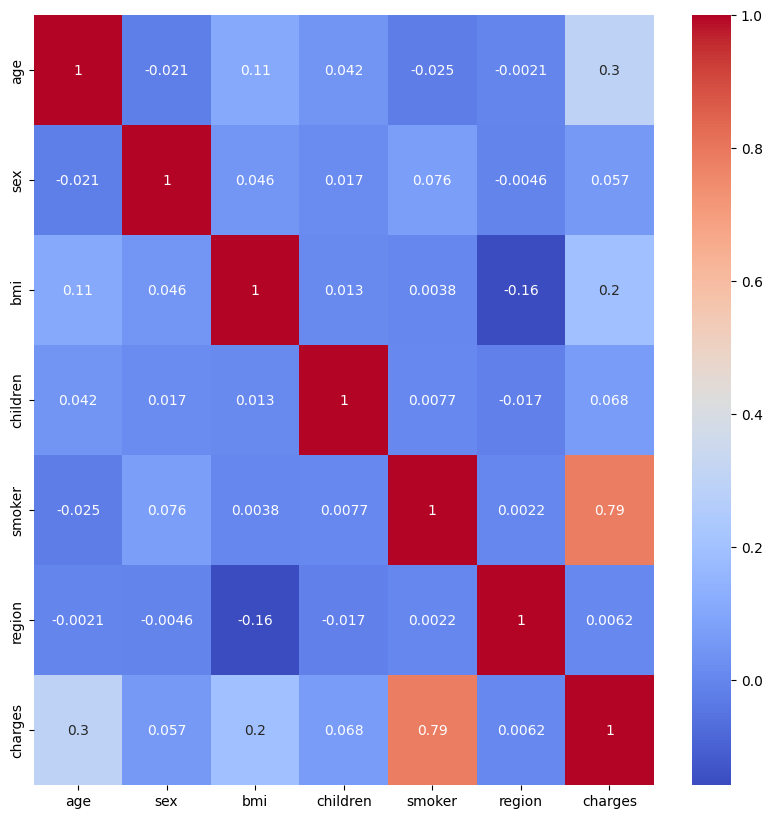

In [4]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The variable smoker shows a significant coorelation with the medical expenses. Now I will explore more into patients' smoking habits and their relation with other factors.

# Plotting the smoker count with patient's gender

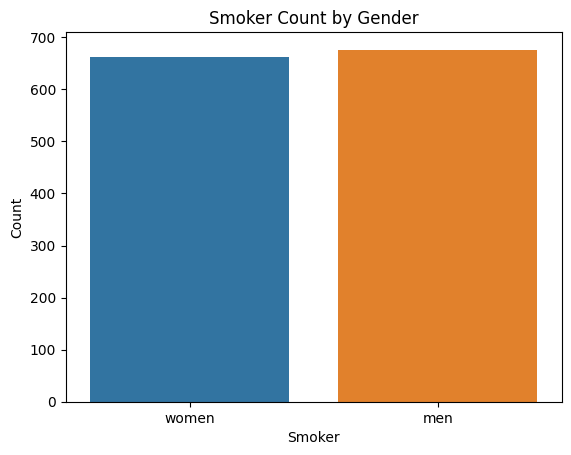

In [5]:
number_to_label = {
    0: 'women',
    1: 'men'   
}

# Map the 'smoker' column in the DataFrame to labels
df['sex'] = df['sex'].map(number_to_label)


# Create the count plot for smokers
sns.countplot(x='sex', data=df)
plt.title('Smoker Count by Gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

We can notice more male smokers than female smokers. So, I will assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

# Smokers and age distribution

/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x500 with 0 Axes>

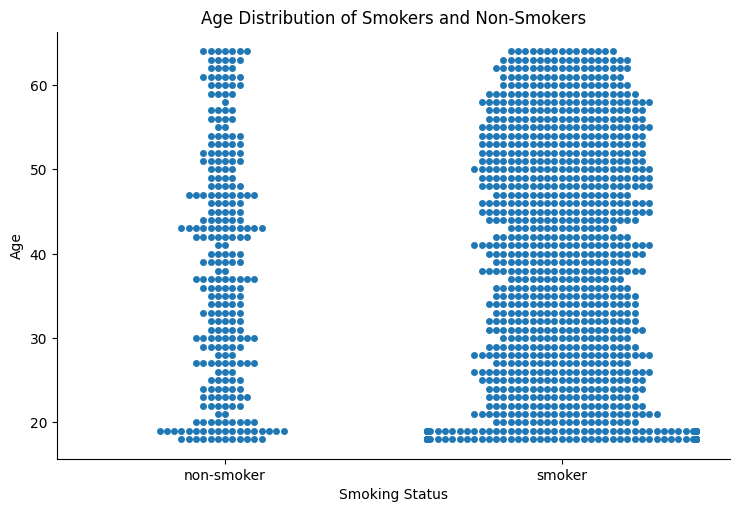

In [6]:
# Define a dictionary to map numbers to smoker labels
number_to_label = {
    0: 'smoker',
    1: 'non-smoker'
}

# Map the 'smoker' column in the DataFrame to labels
df['smoker'] = df['smoker'].map(number_to_label)

# Create a categorical scatter plot to visualize age distribution of smokers and non-smokers
plt.figure(figsize=(8, 5))
sns.catplot(x="smoker", y="age", kind="swarm", data=df, height=5, aspect=1.5)

# Set labels and title for the plot
plt.title("Age Distribution of Smokers and Non-Smokers")
plt.xlabel('Smoking Status')
plt.ylabel('Age')

# Show the plot
plt.show()

#histogram of displayd by age


<Axes: xlabel='age', ylabel='Count'>

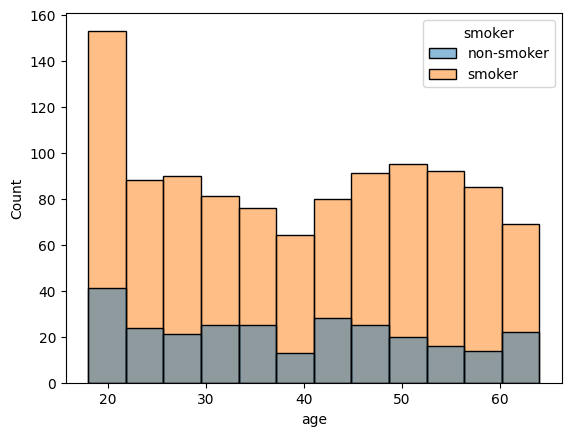

In [7]:
sns.histplot(data=df, x="age", hue="smoker")

From the graph, we can see that there significant number of smokers of age 19. 


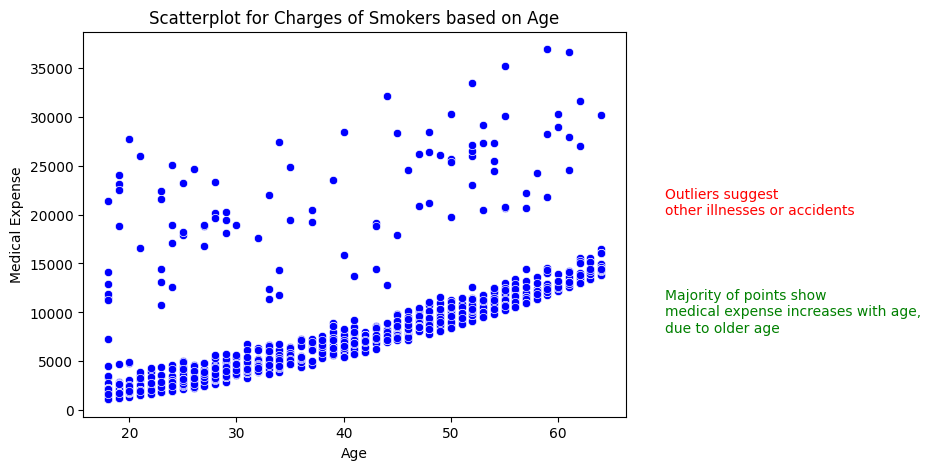

In [8]:
#import matplotlib.pyplot as plt
#import seaborn as sns

plt.figure(figsize=(7, 5))
plt.title("Scatterplot for Charges of Smokers based on Age")

# Create a scatter plot to visualize charges of smokers based on age
sns.scatterplot(x="age", y="charges", data=df[df['smoker'] == 'smoker'], marker='o', color='blue')

# Set labels for the plot
plt.xlabel('Age')
plt.ylabel('Medical Expense')

# Add annotations for the observed patterns
plt.text(70, 8000, "Majority of points show\nmedical expense increases with age,\ndue to older age", fontsize=10, color='green')
plt.text(70, 20000, "Outliers suggest\nother illnesses or accidents", fontsize=10, color='red')

# Show the plot
plt.show()


Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliners which shows that there are other illness or accidents which may increase the medical expense.

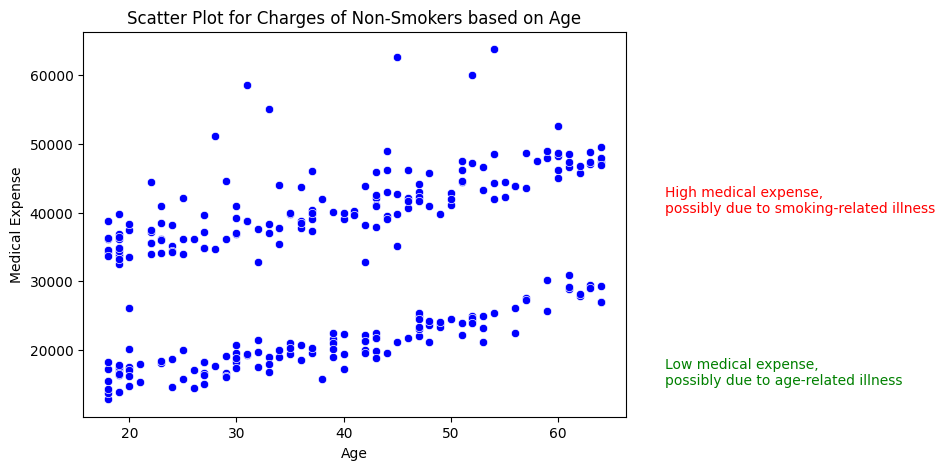

In [9]:

plt.figure(figsize=(7, 5))
plt.title("Scatter Plot for Charges of Non-Smokers based on Age")

# Create a scatter plot to visualize charges of non-smokers based on age
sns.scatterplot(x="age", y="charges", data=df[df['smoker'] == 'non-smoker'], marker='o', color='blue')

# Set labels for the plot
plt.xlabel('Age')
plt.ylabel('Medical Expense')

# Add annotation for the observed patterns
plt.text(70, 40000, "High medical expense,\npossibly due to smoking-related illness", fontsize=10, color='red')
plt.text(70, 15000, "Low medical expense,\npossibly due to age-related illness", fontsize=10, color='green')

# Show the plot
plt.show()


Here we see pecularity in the graph. In the graph there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

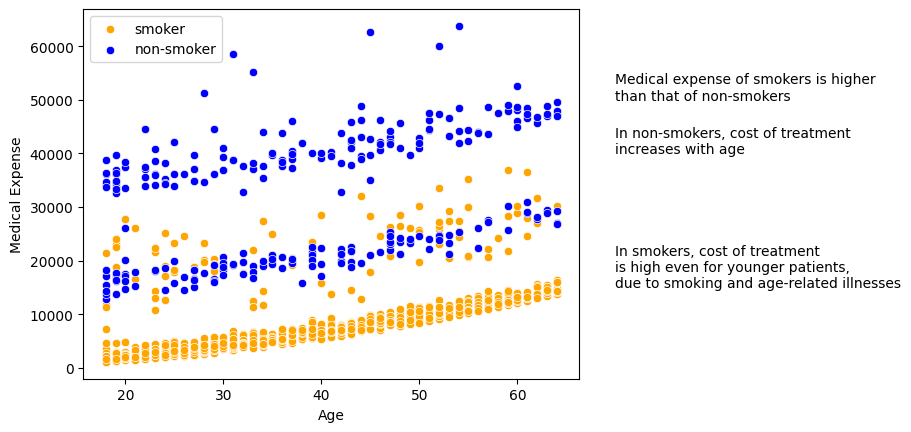

In [10]:

# Set the custom colors for smokers and non-smokers
custom_palette = {'smoker': 'orange', 'non-smoker': 'blue'}

# Create scatter plots for smokers and non-smokers
sns.scatterplot(x='age', y='charges', data=df[df['smoker'] == 'smoker'], color='orange', label='smoker')
sns.scatterplot(x='age', y='charges', data=df[df['smoker'] == 'non-smoker'], color='blue', label='non-smoker')

# Set the labels for x and y axes
plt.xlabel('Age')
plt.ylabel('Medical Expense')

# Add annotation for the observed patterns
plt.text(70, 50000, "Medical expense of smokers is higher\nthan that of non-smokers", fontsize=10, color='black')
plt.text(70, 40000, "In non-smokers, cost of treatment\nincreases with age", fontsize=10, color='black')
plt.text(70, 15000, "In smokers, cost of treatment\nis high even for younger patients,\ndue to smoking and age-related illnesses", fontsize=10, color='black')

# Show the legend
plt.legend()

# Show the plot
plt.show()

#use plotly to characterize how to find out


Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers.
In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.

In [11]:
df.groupby(["smoker"])['charges'].mean()

smoker
non-smoker    32050.231832
smoker         8434.268298
Name: charges, dtype: float64

In [12]:
# Two sample, two population t-test.
# H0 mean_smoker = mean_no_smoker
# H1 mean_smoker != mean_no_smoker

In [13]:
from scipy.stats import ttest_ind

# Extract charges for smokers and non-smokers
charges_smoker = df[df['smoker'] == 'smoker']['charges']
charges_non_smoker = df[df['smoker'] == 'non-smoker']['charges']

# Perform the t-test
t_statistic, p_value = ttest_ind(charges_smoker, charges_non_smoker, equal_var=False)

# Define the significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis: Mean charges for smokers and non-smokers are not equal.")
else:
    print("Fail to reject null hypothesis: Mean charges for smokers and non-smokers are equal.")


T-statistic: -32.751887766341824
P-value: 5.88946444671698e-103
Reject null hypothesis: Mean charges for smokers and non-smokers are not equal.


# Charges distribution for patients with BMI greater than 30 that is obese patients

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_45415/836969744.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['charges'])


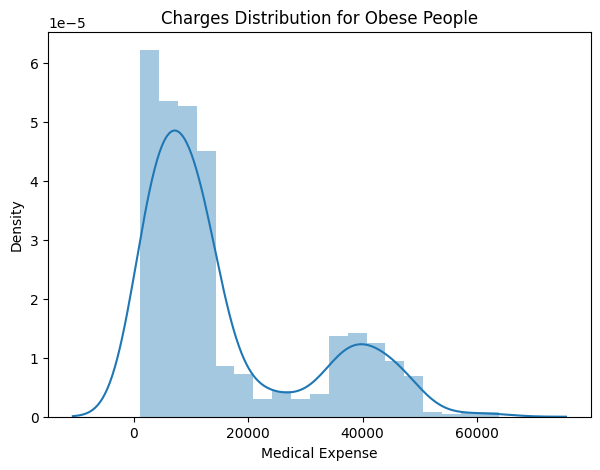

In [14]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

# Charges distribution for patients with BMI less than 30 that is healthy patients

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_45415/887406048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'])


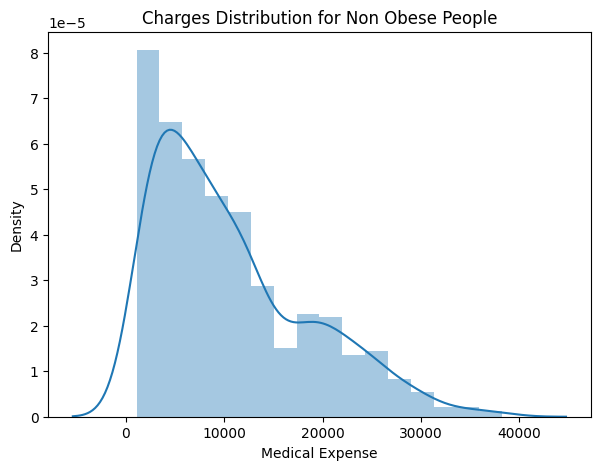

In [15]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.